In [6]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
import numba
from numba import njit, jit
from statistics import mean
from sklearn.datasets.samples_generator import make_blobs
from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin

class Kmeans(BaseEstimator, ClusterMixin, TransformerMixin):               # Input: processed dataset, Output: clustered data (kmeans, kmeans++)
    def __init__(self, inits=10, k=8, maxit=300, method="++", tol = 1e-3):
        
        self.labels_ = None
        self.cluster_centers_ = None
        self._inits = inits
        self._k = k
        self._maxit = maxit
        self._method = method
        self._tol = tol
       # dot = np.random.choice(range(len(self._data)), self._k, replace=False)
        #self._clusters = self._data[dot]
   

    def fit(self,data):
        self._data = data
        best_clust = float('inf')
        
        for i in (range(self._inits)):
            
            if self._method == "rng": # random centers are choosen
                #print("rng")
                dot = np.random.choice(range(len(self._data)), self._k, replace=False)
                self.cluster_centers_ = self._data[dot]
            elif self._method == "++": # kmeans++ is initiated
                #print("++")
                dot = np.random.choice(len(self._data), replace=False) # random startpunkt
                clusters = np.array([self._data[dot]])
                pointer = np.array([])
                for i in range (self._k-1):
                    D = np.array([])
            
                    for j in range (len(self._data)):
                        D = np.append(D,np.min(np.sum((self._data[j]-clusters)**2, axis = 1)))
                
                    pointer = np.append(pointer, D, axis = 0) 
            
                    p = D/np.sum(D)
                    cummulative_p = np.cumsum(p)
            
                    r = random.random()
                    ind = np.where(cummulative_p >= r)[0][0]
            
                    clusters = np.append(clusters,[self._data[ind]], axis = 0)
                self.cluster_centers_ = clusters
            else:
                raise AttributeError("No valid method")

            old_centroids = None
            
            for i in range(self._maxit):
                old_centroids = self.cluster_centers_.copy()
                clusters = np.expand_dims(self.cluster_centers_, axis=1)
                data = np.expand_dims(self._data, axis=0)
                eucl = np.linalg.norm(clusters-data, axis=2) # euclidean dist by using integrated numpy function
                self.labels_ = np.argmin(eucl, axis = 0)
                for i in range(self._k): # range of clusters
                    position = np.where(self.labels_ == i) # position im array bestimmen und dann die entspechenden punkte aus data auslesen
                    self.cluster_centers_[i] = self._data[position].mean(axis = 0)
                    #out = pd.DataFrame(data[np.argwhere(dist == i)].squeeze())
                overall_quality = np.sum(np.min(eucl.T, axis=1))
                if overall_quality < best_clust:
                    best_clust = overall_quality
                    best_dist = self.labels_
                    best_centers = self.cluster_centers_
                if np.linalg.norm(self.cluster_centers_ - old_centroids) < self._tol:
                    break
            self.cluster_centers_ = best_centers
            self.labels_ = best_dist
            self.inertia_ = best_clust
                
        return self
   
    
    def predict(self, X):
        clusters = np.expand_dims(self.cluster_centers_, axis=1)
        data = np.expand_dims(X, axis=0)
        eucl = np.linalg.norm(clusters-data, axis=2) # euclidean dist by using integrated numpy function
        self.labels_ = np.argmin(eucl, axis = 0)
        return self.labels_ #returns the cluster with minimum distance
    
    def transform(self, X):
        clusters = np.expand_dims(self.cluster_centers_, axis=1)
        data = np.expand_dims(X, axis=0)
        eucl = np.linalg.norm(clusters-data, axis=2)
        return eucl.T

In [2]:
### importieren
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs #random data generator
import pandas as pd
import time

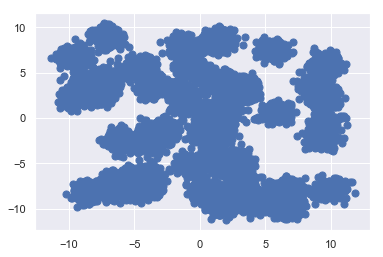

In [3]:
#generate data
X, y_true = make_blobs(n_samples=10000, centers=50,
                       cluster_std=0.60, random_state=0, )
plt.scatter(X[:, 0], X[:, 1], s=50);

# init =1

In [4]:
liste = []
lib = Kmeans(inits=1, method="rng")
for i in range(100):
    start = time.time()
    lib.fit(X)
    end = time.time()
    liste.append(end-start)
   # print(end-start)
print( "Time:"+ str(np.sum(liste)))
print( "Mean Time:"+ str(np.mean(liste)))

NameError: name 'Kmeans' is not defined

# init =2

In [ ]:
liste = []
lib = Kmeans(inits=2, method="rng")
for i in range(100):
    start = time.time()
    lib.fit(X)
    end = time.time()
    liste.append(end-start)
   # print(end-start)
print( "Time:"+ str(np.sum(liste)))
print( "Mean Time:"+ str(np.mean(liste)))

# init =10

In [ ]:
liste = []
lib = Kmeans(inits=10, method="rng")
for i in range(100):
    start = time.time()
    lib.fit(X)
    end = time.time()
    liste.append(end-start)
   # print(end-start)
print( "Time:"+ str(np.sum(liste)))
print( "Mean Time:"+ str(np.mean(liste)))

In [ ]:
from WWDK_Package import Cluster as cl

In [ ]:
liste = []
lib = cl.Kmeans(inits=1, method="rng")
for i in range(100):
    start = time.time()
    lib.fit(X)
    end = time.time()
    liste.append(end-start)
   # print(end-start)
print( "Time:"+ str(np.sum(liste)))
print( "Mean Time:"+ str(np.mean(liste)))

In [ ]:
import sklearn.cluster as sk
sk_kmeans = sk.KMeans(init="random",n_init=1)
liste = []
for i in range(100):
    start = time.time()
    sk_kmeans.fit(X)
    end = time.time()
    liste.append(end-start)
    #print(end-start)
print( "Time:"+ str(np.sum(liste)))
print( "Mean Time:"+ str(np.mean(liste)))

In [ ]:
lib.inertia_

In [ ]:
X.dtype

In [ ]:
from WWDK_Package import Cluster as cl
liste = []
for i in range(15):
    lib = cl.Kmeans(inits=10, method="rng", k=i+1)
    lib.fit(X)
    liste.append(lib.inertia_)
    #print(lib.inertia_)
plt.plot(liste, "kx")
plt.plot(liste)
plt.xlabel("k")
plt.ylabel("score")
plt.show()

In [ ]:
from WWDK_Package import Data as d

In [5]:
pbmc = d.Loader("http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz")._to_array()

NameError: name 'd' is not defined

In [56]:
def plot(data, dist, clusters,k):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(k):
        graph = pd.DataFrame(data[np.argwhere(dist == i)].squeeze())
        center = pd.DataFrame(clusters[i]).T
        #print("Cluster"+ str(i) +  " -- Assigned Points \n" + str(graph))
        ax.plot(graph[0], graph[1], "o")
        ax.plot(center[0],center[1], "kx")
        ax.annotate("Cluster " + str(i), xy = (center[0],center[1])
            )
    plt.show

In [7]:
%config InlineBackend.figure_format = "retina"
plot(X,lib.labels_, lib.cluster_centers_, 50)

NameError: name 'lib' is not defined

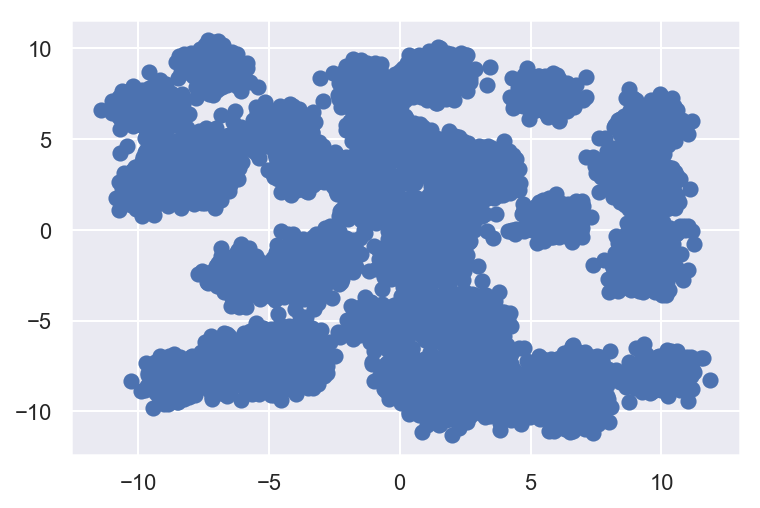

In [8]:

plt.scatter(X[:, 0], X[:, 1], s=50);

In [9]:
from sklearn.datasets import load_iris
data = load_iris()

In [10]:
iris_data = data["data"]


In [11]:
import sklearn.cluster as sk
sk_kmeans = sk.KMeans(init="random")
from WWDK_Package import Cluster as cl
wwdk_kmeans = cl.Kmeans(method="rng")

/anaconda3/envs/igem/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


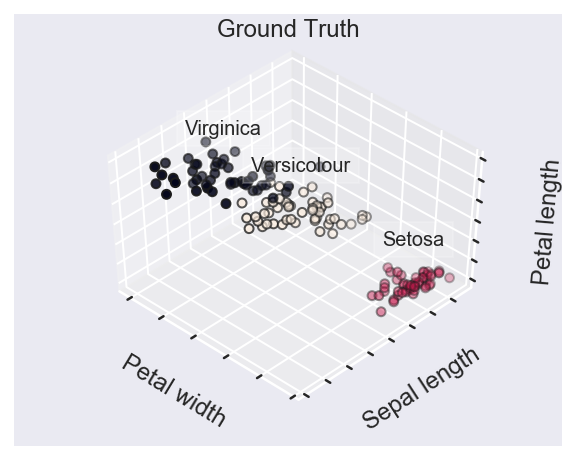

In [12]:
%config InlineBackend.figure_format = "retina"
from mpl_toolkits.mplot3d import Axes3D
#sk_kmeans.fit(iris_data)
#labels = sk_kmeans.labels_
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
y = data.target
for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(iris_data[y == label, 3].mean(),
              iris_data[y == label, 0].mean(),
            iris_data[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(iris_data[:, 3], iris_data[:, 0], iris_data[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

In [13]:
wwdk_kmeans.fit_transform(iris_data).shape

(150, 8)

In [14]:
sk_kmeans.fit_transform(iris_data).shape

(150, 8)

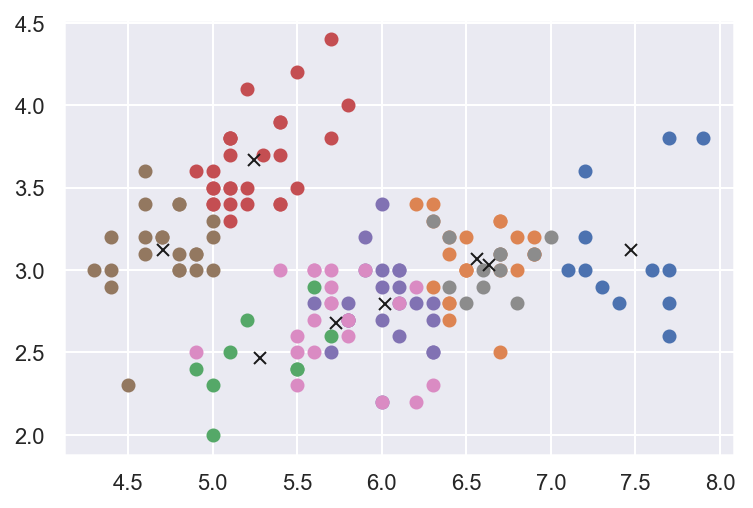

In [15]:
plot(iris_data, wwdk_kmeans.labels_, wwdk_kmeans.cluster_centers_, 8)

In [16]:
pkmn = pd.read_csv('/Users/benedict/Desktop/Programmieren/Phyton/Pokemon/pokemon.csv', index_col=0)

In [17]:
atk_def = np.array(pkmn[["Attack","Defense"]])

In [18]:
pkm_clust = cl.Kmeans(k=3)
pkm_clust.fit(atk_def)

Kmeans(inits=None, k=None, maxit=None, method=None, tol=None)

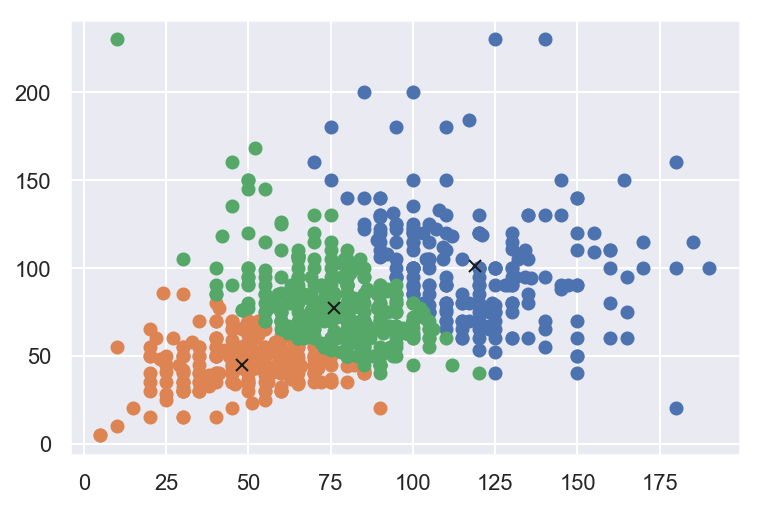

In [19]:
plot(atk_def, pkm_clust.labels_, pkm_clust.cluster_centers_, 3)

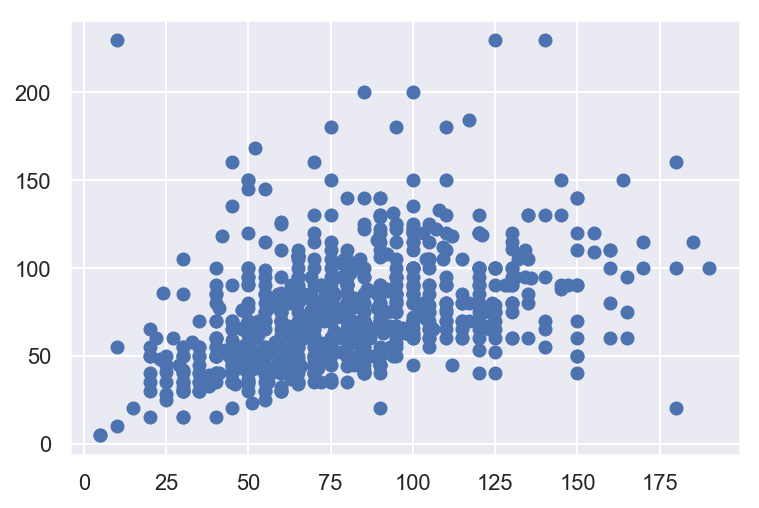

In [20]:
plt.scatter(atk_def[:,0],atk_def[:,1])


In [21]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.manifold import TSNE

In [22]:
test = pkmn[["Attack","Defense","Sp. Atk", "Sp. Def","Speed", "Type 1"]]
norm = preprocessing.normalize(test[["Attack","Defense","Sp. Atk", "Sp. Def","Speed"]])
scaled = preprocessing.scale(norm)
types = np.array(test["Type 1"].drop_duplicates())
type_list = np.array(test["Type 1"])

In [23]:
pca = PCA()
one = pca.fit_transform(test[["Attack","Defense","Sp. Atk", "Sp. Def","Speed"]])
two = pca.fit_transform(scaled)
per_var = np.round(pca.explained_variance_ratio_*100, decimals= 1)
labels = ["PC" + str(x) for x in range(1,len(per_var)+1)]
pca_df1 = pd.DataFrame(one, columns= labels )
pca_df2 = pd.DataFrame(two, columns= labels )


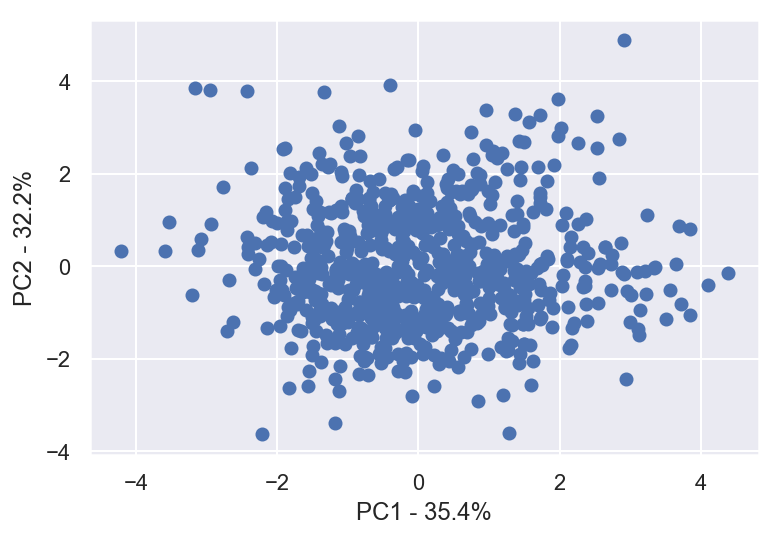

In [24]:
plt.scatter(pca_df2.PC1, pca_df2.PC2)
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))


plt.show()

In [25]:

tsne = TSNE()
tsned =tsne.fit_transform(two)
poke_clust = cl.Kmeans(k=8)
poke_clust.fit_transform(tsned)



array([[ 2.575809 , 39.390995 , 16.278194 , ..., 47.19915  , 17.70356  ,
        25.199306 ],
       [ 1.913606 , 39.612076 , 17.04979  , ..., 47.138935 , 17.721373 ,
        24.524742 ],
       [ 1.8993605, 39.337944 , 17.511192 , ..., 46.656403 , 17.302954 ,
        23.851164 ],
       ...,
       [12.508554 , 34.58816  , 26.049889 , ..., 37.877037 , 12.140718 ,
        13.36052  ],
       [13.767581 , 33.70039  , 26.709991 , ..., 36.630867 , 11.527713 ,
        12.851778 ],
       [20.93229  , 21.950954 , 15.12816  , ..., 34.001625 ,  9.898772 ,
        31.884539 ]], dtype=float32)

In [26]:
def elbow_plot(data, iterations):
    liste = []
    for i in range(iterations):
        lib = cl.Kmeans(inits=10, method="rng", k=i+1)
        lib.fit(data)
        liste.append(lib.inertia_)
        #print(lib.inertia_)
    plt.plot(liste, "kx")
    plt.plot(liste)
    plt.xlabel("k")
    plt.ylabel("score")
    return plt.show()

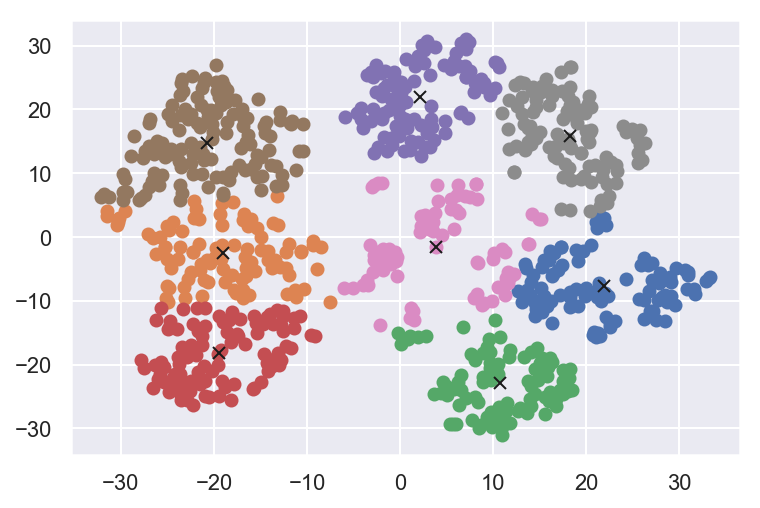

In [27]:
plot(tsned, poke_clust.labels_, poke_clust.cluster_centers_, 8)

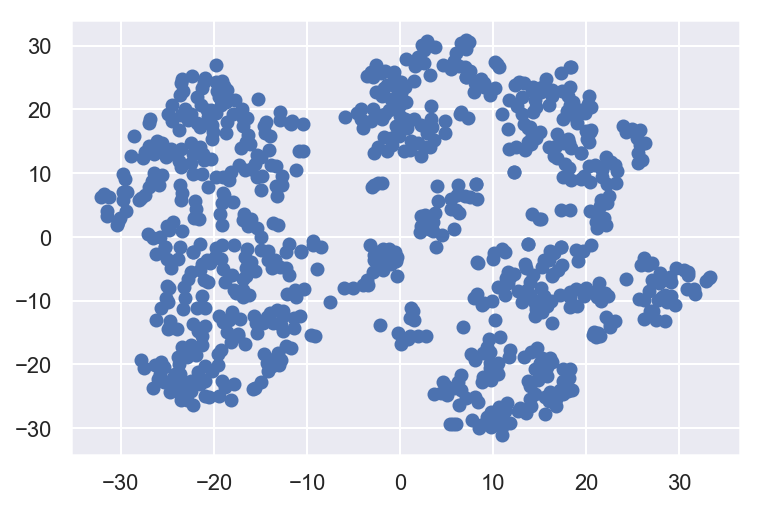

In [28]:
plt.scatter(tsned[:,0],tsned[:,1])

In [29]:
tsned.shape

(800, 2)

In [31]:
pure_sne = TSNE()
pure_sned = pure_sne.fit_transform(scaled)

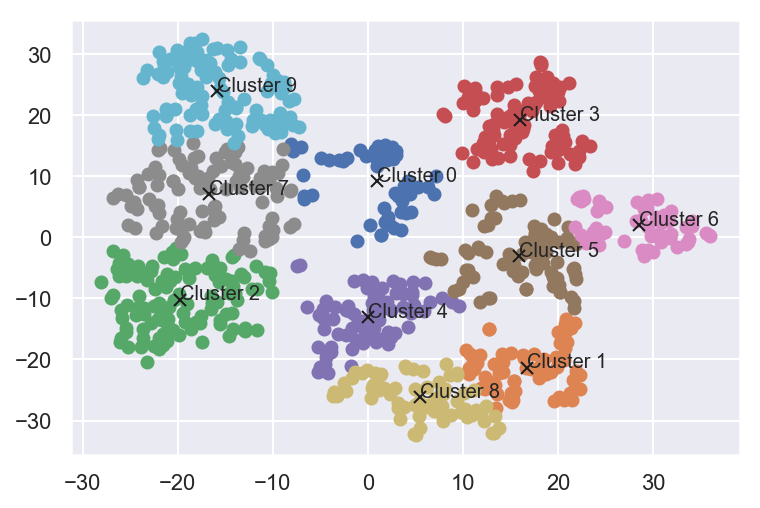

In [57]:
kmean = cl.Kmeans(k = 10)
kmean.fit(pure_sned)
plot(pure_sned, kmean.labels_, kmean.cluster_centers_, 10)

In [36]:
tsned_with_type =pd.DataFrame(pure_sned)
tsned_with_type["Type"] = type_list
#plt.scatter(tsned_with_type.iloc[:,0],tsned_with_type.iloc[:,1], c="w")


In [37]:
types
colors_shapes = ["go","rx","bv","gx", "co", "mv","yx","g^","m*","rh","mX","kD","wo","wD","rP","ko","ys","b*"]
dict_type_color = dict(zip(types,colors_shapes))

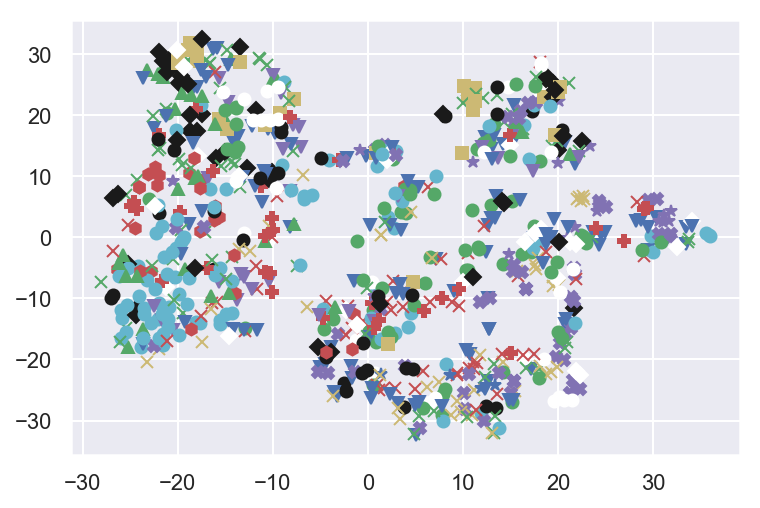

In [38]:
for i in range(tsned_with_type.shape[0]):
    color = dict_type_color[tsned_with_type.iloc[i,2]]
    plt.plot(tsned_with_type.iloc[i,0],tsned_with_type.iloc[i,1],color)

In [39]:
dict_type_color

{'Grass': 'go',
 'Fire': 'rx',
 'Water': 'bv',
 'Bug': 'gx',
 'Normal': 'co',
 'Poison': 'mv',
 'Electric': 'yx',
 'Ground': 'g^',
 'Fairy': 'm*',
 'Fighting': 'rh',
 'Psychic': 'mX',
 'Rock': 'kD',
 'Ghost': 'wo',
 'Ice': 'wD',
 'Dragon': 'rP',
 'Dark': 'ko',
 'Steel': 'ys',
 'Flying': 'b*'}

In [40]:
pkmn_red =pkmn.drop(["Legendary", "Generation"], axis=1)
pkmn_red["Cluster"] = kmean.labels_

In [41]:

for i in range(pkmn_red.shape[0]):
    pass


In [42]:
kmean.labels_.shape

(800,)

<function matplotlib.pyplot.show(*args, **kw)>

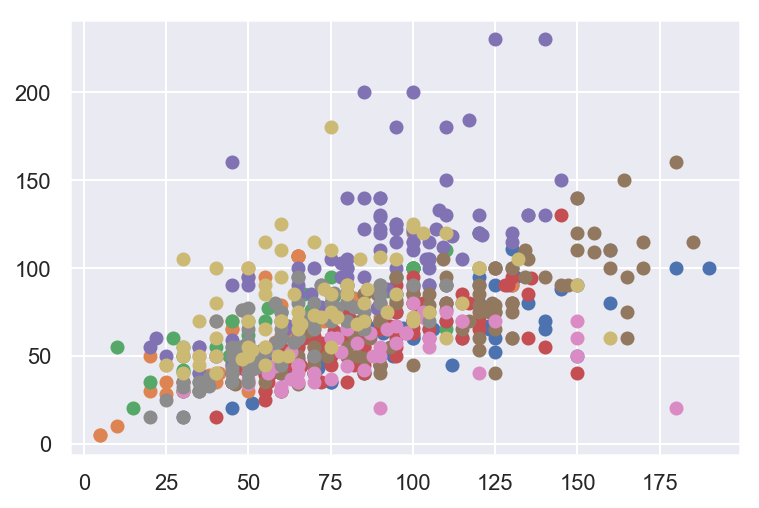

In [53]:
for i in range(9):
    Cluster0 = pkmn_red[pkmn_red.Cluster == i]
    plt.plot(Cluster0.Attack,Cluster0.Defense, "o")
plt.show

In [104]:
color = {
    0 : "b",
    1 : "g",
    2 : "r",
    3 : "c",
    4 : "m",
    5 : "y",
    6 : "k",
    7 : "w",
    8 : "b",
    9 : "g"
    
}

<function matplotlib.pyplot.show(*args, **kw)>

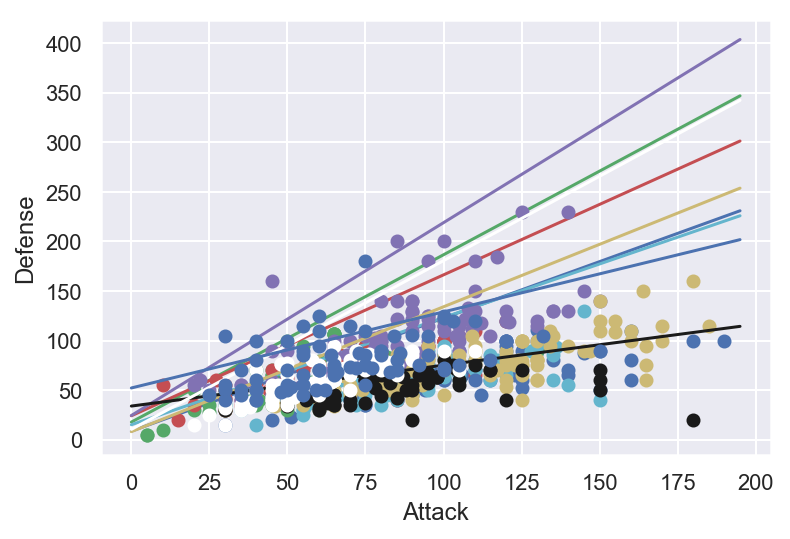

In [48]:
from sklearn.linear_model import LinearRegression

for i in range(9):
    Cluster0 = pkmn_red[pkmn_red.Cluster == i]
    linreg = LinearRegression()
    linreg.fit(np.array(Cluster0.Attack).reshape(-1, 1),np.array(Cluster0.Defense))
    
    plt.plot(Cluster0.Attack,Cluster0.Defense, "o", color= color[i])
    plt.plot(np.array((0,195)).reshape(-1, 1),linreg.predict(np.array((0,400)).reshape(-1, 1)),color= color[i])
    plt.xlabel("Attack")
    plt.ylabel("Defense")
plt.show



In [49]:
for i in range(9):
    Cluster0 = pkmn_red[pkmn_red.Cluster == i]
    print(Cluster0.Defense.mean())

66.14285714285714
60.70909090909091
69.24561403508773
58.16814159292036
104.67326732673267
75.40196078431373
51.27272727272727
60.370370370370374
78.84415584415585


In [50]:
Cluster0 = pkmn_red[pkmn_red.Cluster == 0]


In [51]:
pkmn_comparer = pkmn_red[pkmn_red.Cluster == 0].mean(axis = 0)
pkmn_final = pd.DataFrame(pkmn_comparer).T
for i in range(8):
    pkmn_red[pkmn_red.Cluster == i+1].mean(axis = 0)
    pkmn_final = pkmn_final.append(pd.DataFrame(pkmn_red[pkmn_red.Cluster == i+1].mean(axis = 0)).T)
pkmn_final.set_index("Cluster")
    

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Cluster,,,,,,,
0.0,497.400000,83.085714,103.371429,66.142857,101.942857,67.842857,75.014286
1.0,432.545455,73.163636,52.109091,60.709091,78.272727,102.400000,65.890909
2.0,412.684211,67.824561,65.035088,69.245614,62.157895,73.964912,74.456140
3.0,397.637168,62.123894,81.628319,58.168142,52.017699,56.858407,86.840708
4.0,409.396040,64.910891,84.613861,104.673267,49.821782,54.534653,50.841584
5.0,448.313725,75.421569,109.490196,75.401961,58.578431,71.137255,58.284314
6.0,451.400000,66.400000,85.963636,51.272727,92.400000,57.200000,98.163636
7.0,450.160494,63.703704,60.172840,60.370370,100.308642,75.012346,90.592593
8.0,453.766234,74.116883,71.129870,78.844156,101.610390,79.233766,48.831169


In [58]:
pkmn_final.drop(["Cluster", "Total"], axis = 1).max(axis = 0)

HP          83.085714
Attack     109.490196
Defense    104.673267
Sp. Atk    101.942857
Sp. Def    102.400000
Speed       98.163636
dtype: float64

In [102]:
pkmn_red[pkmn_red.Cluster == 5][["Attack",]].max()

Attack    185
dtype: int64

In [103]:
test = pkmn_red[pkmn_red["Attack"] >= 185]
test[test.Cluster == 4]
test

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster
#,,,,,,,,,,,
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,0
214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,5


In [72]:
pkmn_red[pkmn_red["Name"] == "Shuckle"]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster
#,,,,,,,,,,,
213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,9
